### 궁금한 지역의 인구 구조와 가장 비슷한 인구 구조를 가진 지역 찾아보기

In [1]:
import csv

f = open('age.csv', encoding='cp949')
data = csv.reader(f)
next(data) #'행정구역','2023년09월_계_총인구수','2023년09월_계_연령구간인구수','2023년09월_계_0세' etc

region = input('인구 구조가 알고 싶은 지역의 이름을 입력해주세요(읍면동 단위): ')
result = []

for row in data:
    #print(row)  #->숫자 형태의 문자열을 정수로 변환하는 작업 필요
    row[1:] = map(int, row[1:])
    if region in row[0]:
        for i in row[3:]:
            result.append(i)
        break
        
print(result)

인구 구조가 알고 싶은 지역의 이름을 입력해주세요(읍면동 단위): 신도림
[222, 251, 255, 261, 307, 273, 302, 367, 411, 388, 367, 392, 382, 385, 363, 369, 325, 317, 326, 310, 341, 343, 384, 387, 373, 416, 460, 498, 462, 480, 523, 561, 543, 498, 606, 606, 631, 595, 606, 617, 685, 668, 734, 658, 700, 616, 608, 558, 624, 646, 625, 611, 598, 584, 540, 488, 455, 473, 502, 431, 441, 450, 465, 487, 435, 418, 398, 368, 429, 335, 330, 310, 216, 284, 235, 247, 234, 149, 148, 115, 132, 144, 110, 87, 90, 82, 66, 75, 39, 38, 24, 20, 14, 6, 12, 11, 6, 6, 7, 0, 4]


인구 구조가 알고 싶은 지역의 이름을 입력해주세요(읍면동 단위): 신도림


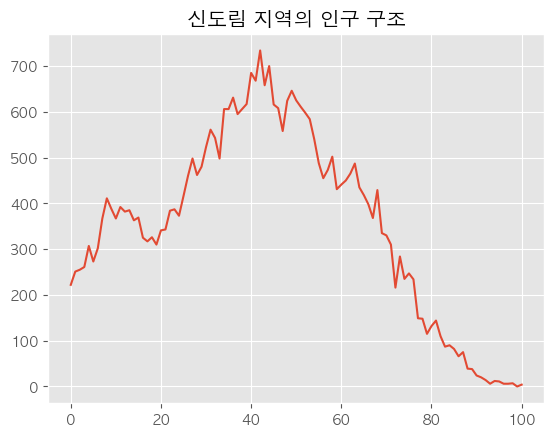

In [2]:
import csv
import matplotlib.pyplot as plt

f = open('age.csv', encoding='cp949')
data = csv.reader(f)
next(data) #'행정구역','2023년09월_계_총인구수','2023년09월_계_연령구간인구수','2023년09월_계_0세' etc

region = input('인구 구조가 알고 싶은 지역의 이름을 입력해주세요(읍면동 단위): ')
result = []

for row in data:
    #print(row)  #->숫자 형태의 문자열을 정수로 변환하는 작업 필요
    row[1:] = map(int, row[1:])
    if region in row[0]:
        for i in row[3:]:
            result.append(i)
        break
 
#꺾은선 그래프로 나타내기
#print(result)
plt.style.use('ggplot')
plt.rc('font', family='AppleGothic')
plt.title(region +' 지역의 인구 구조')
plt.plot(result)
plt.show()

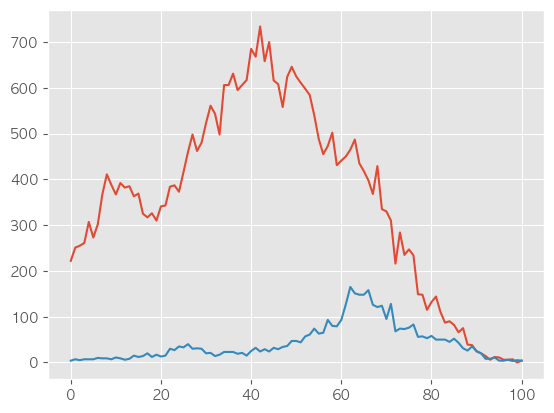

In [3]:
import csv
import matplotlib.pyplot as plt

f = open('age.csv', encoding='cp949')
data = csv.reader(f)
next(data) #'행정구역','2023년09월_계_총인구수','2023년09월_계_연령구간인구수','2023년09월_계_0세' etc

#0번 인덱스는 신도림, 1번 인덱스에는 화촌
result = [[],[]]

for row in data:
    row[1:] = map(int, row[1:])
    if '신도림' in row[0]:
        for i in row[3:]:
            result[0].append(i)

    if '화촌' in row[0]:
        for i in row[3:]:
            result[1].append(i)
        break
 
#꺾은선 그래프로 나타내기
plt.style.use('ggplot')
plt.rc('font', family='AppleGothic')
plt.plot(result[0])
plt.plot(result[1])
plt.show()

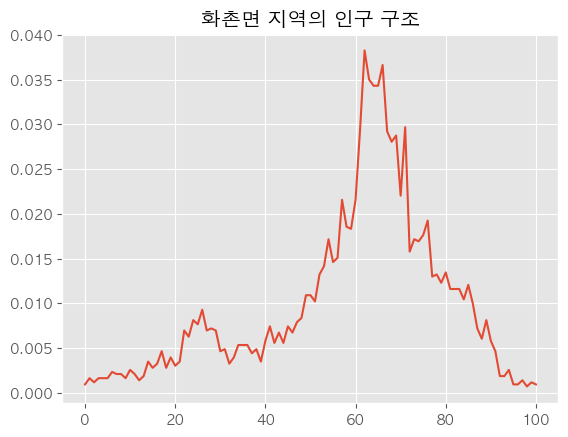

In [4]:
import csv
import matplotlib.pyplot as plt

f = open('age.csv', encoding='cp949')
data = csv.reader(f)
next(data)

result = []

for row in data:
    row[1:] = map(int, row[1:])
    if '화촌' in row[0]:
        for j in row[3:]:
            result.append(j/row[2])
        break
        
plt.rc('font', family='AppleGothic')
plt.title('화촌면 지역의 인구 구조')
plt.plot(result)
plt.show()

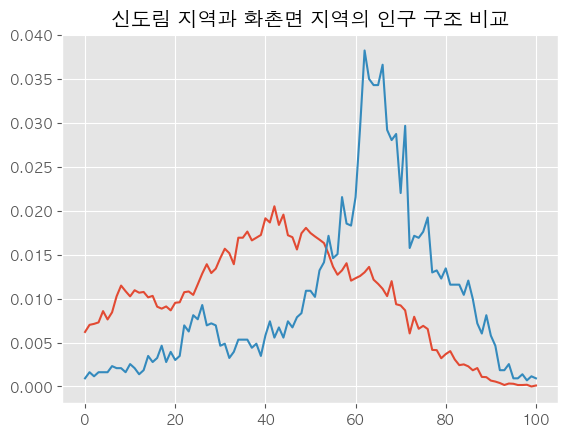

In [5]:
import csv
import matplotlib.pyplot as plt

f = open('age.csv', encoding='cp949')
data = csv.reader(f)
next(data)

result = [[],[]]

for row in data:
    row[1:] = map(int, row[1:])
    if '신도림' in row[0]:
        #비율 = 연령대별 인구수 / 그 지역 전체 인구수
        for i in row[3:]:
            result[0].append(i/row[2])
            
    if '화촌' in row[0]:
        for j in row[3:]:
            result[1].append(j/row[2])
        break
        
plt.rc('font', family='AppleGothic')
plt.title('신도림 지역과 화촌면 지역의 인구 구조 비교')
plt.plot(result[0])
plt.plot(result[1])
plt.show()

❶ 전국의 모든 지역 중 한 곳(B) 선택 & ❷ 궁금한 지역(A) 연령별 인구 비율 - B의 연령별 인구 비율

In [6]:
import csv
import numpy as np

f = open('age.csv', encoding='cp949')
data = csv.reader(f)
next(data)
data = list(data)

#궁금한 지역
name = input('인구 구조가 알고 싶은 지역의 이름을 입력해주세요(읍면동 단위): ')  

for row in data:
    if name in row[0]:
        area = np.array(row[3:], dtype=int)/int(row[2])

for row in data:
    away = np.array(row[3:], dtype=int)/int(row[2])
    print(area-away)

인구 구조가 알고 싶은 지역의 이름을 입력해주세요(읍면동 단위): 신도림
[ 2.15557498e-03  2.59439018e-03  2.50221791e-03  2.52377813e-03
  3.46905031e-03  2.19868328e-03  2.46635915e-03  3.43708509e-03
  4.41520934e-03  3.76771351e-03  2.94652114e-03  3.14989904e-03
  2.84751241e-03  3.23495847e-03  2.68684797e-03  2.24069824e-03
  9.41873787e-04  1.25792119e-03  1.35643184e-03 -3.85207626e-04
  7.52862313e-05 -5.23920058e-04 -1.42970109e-03 -3.07785626e-03
 -3.84825958e-03 -4.05163139e-03 -3.90464897e-03 -3.53973802e-03
 -4.72197817e-03 -4.60042825e-03 -3.42139828e-03 -2.16709435e-03
 -1.21652553e-03 -1.54814404e-03  2.15494036e-03  2.89509135e-03
  3.88177711e-03  2.87205815e-03  3.27499938e-03  3.15793219e-03
  4.07507497e-03  2.72833455e-03  4.42932275e-03  2.26830841e-03
  4.48608268e-03  3.26285107e-03  2.67409233e-03  1.49997331e-03
  2.54531721e-03  1.79542632e-03  1.03142212e-03  3.42761743e-04
 -9.97719255e-04 -4.59385115e-04 -1.83431873e-03 -2.41975493e-03
 -2.06812818e-03 -1.04155951e-03 -7.29026000e-04 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

/var/folders/hg/kcm64gq55_113mgpg87mp2yh0000gn/T/ipykernel_3770/2486865400.py:17: RuntimeWarning: invalid value encountered in true_divide
  away = np.array(row[3:], dtype=int)/int(row[2])


[ 0.00437274  0.00469821  0.00443266  0.00424998  0.00486197  0.00369593
  0.00412922  0.00564968  0.006071    0.00502376  0.0038168   0.00456954
  0.00439782  0.00321484  0.0031659   0.0018781   0.00107942  0.00112534
  0.00124214  0.0011453   0.00287438  0.00322678  0.00340252  0.00305511
  0.00492791  0.00532128  0.00630864  0.00702046  0.00617586  0.00778414
  0.00868964  0.00999445  0.00973388  0.00834121  0.01230356  0.0109289
  0.01208595  0.01116049  0.00963509  0.01067034  0.01063046  0.0094814
  0.01146109  0.00904015  0.01013332  0.00751571  0.00734599  0.00551706
  0.00490914  0.00417641  0.00350852  0.00265896  0.00011228 -0.00119551
 -0.00447397 -0.00498415 -0.00550229 -0.00435223 -0.00521275 -0.00571495
 -0.00691789 -0.0087957  -0.01285079 -0.01202018 -0.01080529 -0.00804599
 -0.01043794 -0.01205821 -0.01016438 -0.00721248 -0.00592367 -0.00969028
 -0.007547   -0.00685912 -0.00844446 -0.00818988 -0.00884977 -0.00534979
 -0.00815402 -0.00999292 -0.00978726 -0.01141947 -0.0

❸ (❷)를 100세 이상 인구수에 해당하는 값까지 반복한 후 각각의 차이 모두 더하기

In [9]:
import csv
import numpy as np

f = open('age.csv', encoding='cp949')
data = csv.reader(f)
next(data)

name = input('인구 구조가 알고 싶은 지역의 이름을 입력해주세요(읍면동 단위): ')  

for row in data:
    if name in row[0]:
        area = np.array(row[3:], dtype=int) / int(row[2])

for row in data:
    away = np.array(row[3:], dtype=int) / int(row[2])
    print(np.sum(area-away))   

인구 구조가 알고 싶은 지역의 이름을 입력해주세요(읍면동 단위): 신도림


❹ 전국 모든 지역 반복하며 그 차이가 가장 작은 지역 찾기

인구 구조가 알고 싶은 지역의 이름을 입력해주세요(읍면동 단위): 신도림


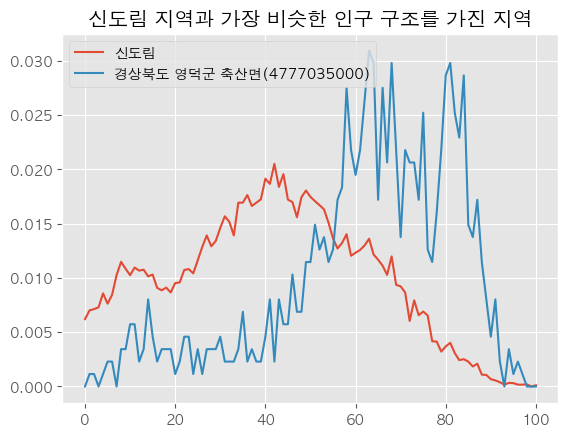

In [32]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('age.csv', encoding='cp949')
data = csv.reader(f)
next(data)
data = list(data)

name = input('인구 구조가 알고 싶은 지역의 이름을 입력해주세요(읍면동 단위): ')  

mn = 1  #최솟값을 저장할 변수 생성 및 초기화
mn_region = ''  #최솟값을 갖는 지역의 이름을 저장할 변수 생성 및 초기화
result = 0  #최솟값을 갖는 지역의 연령대별 인구 비율을 저장할 리스트 생성 및 초기화

for row in data:
    if name in row[0]:
        if int(row[2]) != 0:
            area = np.array(row[3:], dtype=int) / int(row[2])

for row in data:
    if int(row[2]) != 0:
        away = np.array(row[3:], dtype=int) / int(row[2])
        s = np.sum(area-away)
    
        if mn > s:  #최솟값이라면 변수 mn 갱신
            mn = s  #변수 mn 갱신
            mn_region = row[0]  #최솟값이 갖는 지역의 이름 저장
            result = away  #최솟값을 갖는 지역의 연령대별 인구 비율 값 저장
            
plt.rc('font', family='AppleGothic')
plt.title(name +' 지역과 가장 비슷한 인구 구조를 가진 지역')
plt.plot(area, label=name)
plt.plot(result, label=mn_region)
plt.legend(loc='upper left')
plt.show()

In [45]:
import csv
import numpy as np

f = open('age.csv', encoding='cp949')
data = csv.reader(f)
next(data)
data = list(data)

name = input('인구 구조가 알고 싶은 지역의 이름을 입력해주세요(읍면동 단위): ')

for row in data:
    row[2:] = map(int, row[2:])
    if name in row[0]:
        if row[2] != 0:
            area = np.array(row[3:]) / row[2]
    
for row in data:
    away = np.array(row[3:]) / row[2]
    print(np.sum((area-away)**2))

인구 구조가 알고 싶은 지역의 이름을 입력해주세요(읍면동 단위): 신도림
0.0005508628385740893
0.0010979686962976766
0.0005124521322539244
0.0007298952098056862
0.0016725556169466902
0.0008634696588393372
0.0009119750760322346
0.0008656059783421194
0.0002904164935431754
0.0010440646535376842
0.0027894495412630806
0.0035770646204825686
0.0033776163109863508
0.003870215244717467
0.00354581843293542
0.0033389615701143924
0.0014374603079593121
0.0015434801521798333
0.004456012770166603
0.0011132521278874163
0.001420152298471674
0.0029354199072139458
0.0022975555598484247
0.0022102112365937903
0.004638966698367321
0.003580228143629624
0.0035546563304239363
0.002168919339449636
0.0016653520289327574
0.0012841832675103953
0.0012168647775035867
0.001299125038362473
0.0010651761067021204
0.0022682534378387544
0.0004950213055386217
0.0007548909628446855
0.0008928077408018923
0.0017826180138200548
0.0031410515098676613
0.002627713825426855
0.0020581355812270773
0.0007359648100200304
0.0007557736541320532
0.001059433478401617
0.

/var/folders/hg/kcm64gq55_113mgpg87mp2yh0000gn/T/ipykernel_3770/116375934.py:18: RuntimeWarning: invalid value encountered in true_divide
  away = np.array(row[3:]) / row[2]


인구 구조가 알고 싶은 지역의 이름을 입력해주세요(읍면동 단위): 중계1동


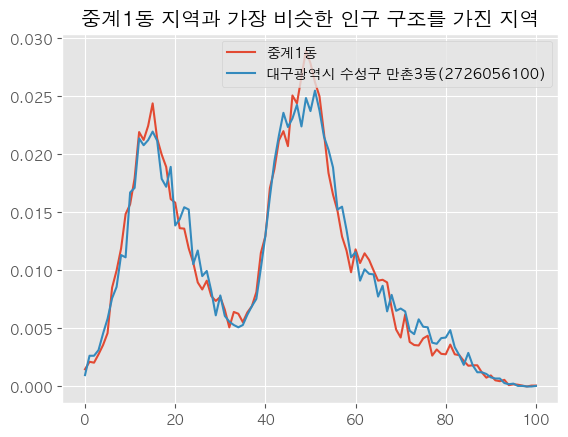

In [51]:
import csv
import numpy as np
import matplotlib.pyplot as plt

f = open('age.csv', encoding='cp949')
data = csv.reader(f)
next(data)
data = list(data)

name = input('인구 구조가 알고 싶은 지역의 이름을 입력해주세요(읍면동 단위): ')

mn = 1
mn_region = ''
result = 0

for row in data:
    row[2:] = map(int, row[2:])
    if name in row[0]:
        if row[2] != 0:
            area = np.array(row[3:]) / row[2]
    
for row in data:
    if row[2] != 0:
        away = np.array(row[3:]) / row[2]
        s = np.sum((area-away)**2)
    
        if mn > s and name not in row[0]:
            mn = s
            mn_region = row[0]
            result = away
        
plt.title(name+ ' 지역과 가장 비슷한 인구 구조를 가진 지역')
plt.plot(area, label=name)
plt.plot(result, label=mn_region)
plt.legend()
plt.show()